<a href="https://colab.research.google.com/github/juooo1117/practice_AI_Learning/blob/main/Self_organizing_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self Organizing Maps

In [2]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Load & Preprocessing (Credit Card Applications)

In [4]:
# importing the dataset
dataset = pd.read_csv('/content/MyDrive/MyDrive/Credit_Card_Applications.csv')

In [21]:
# Class column
## 0: application is not approved, 1: application is approved
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [22]:
# make two subset
x = dataset.iloc[:,:-1].values     # except class column => :-1입력!
y = dataset.iloc[:,-1].values

In [23]:
x

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [24]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [25]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x) # normalized version of 'x' => 모든 값들은 0~1 사이에 존재!
x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

# Training the SOM

In [10]:
# import Minisom
!pip3 install minisom
from minisom import MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=f141c397464d37079aef084093f1cd10784ca14edff78aa28401da3c3634e1d9
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [26]:
# create 10*10 grid
# input_len: number of features
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [27]:
# initialize the weights
som.random_weights_init(x)
# to train the self-organizing maps on X
som.train_random(data=x, num_iteration=100)

In [28]:
x    # training 완료된 x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

# Visualizing the results

In [14]:
# start building the self organizing map
from pylab import bone, pcolor, colorbar, plot, show

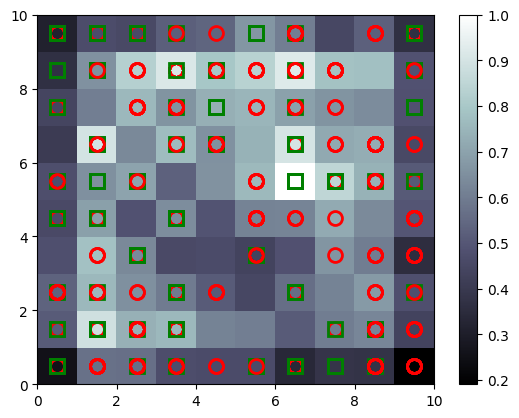

In [29]:
# making the map
# outlier winning node = 사기꾼
bone()                         # initializing map
pcolor(som.distance_map().T)   # 모든 노드의 거리가 반영됨
colorbar()                     # legend
markers = ['o','s']            # y[i]=0일때는 'o(circle)', y[i]=1일때는 's(square)'
colors = ['r','g']             # y[i]=0일때는 'r(red)', y[i]=1일때는 'g(green)'

# i: all the index of all customers, x: all the vectors of the customers
for i, x in enumerate(x):
  winning_node = som.winner(x)                         # winning node를 가져옴 (winning node의 좌표)
  # winning node의 좌표: (winning_node[0], winning_node[1])
  plot(winning_node[0] + 0.5, winning_node[1] + 0.5,   # marker를 winning node의 중심에 놓아야함 (0.5를 더해줌!)
       markers[y[i]],                                  # 고객이 승인되면 y[i]=0, 승인안되면 y[i]=1
       markeredgecolor = colors[y[i]],                 # 고객이 승인되면 y[i]=0, 승인안되면 y[i]=1
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)

show()

In [46]:
x

array([0.10690789, 1.        , 0.40977444, 0.00142857, 0.5       ,
       0.69230769, 0.375     , 0.00140351, 0.        , 1.        ,
       0.01492537, 0.        , 0.        , 0.28      , 0.        ])

# Finding the frauds

In [ ]:
# frauds: outlier winning node
# winning node의 좌표를 사용해서 customer list를 만들자

mappings = som.win_map(x)      # SOMs의 winning node mapping 정보를 가져옴
frauds = np.concatenate((mappings[(6,5)], mappings[(6,8)]), axis = 0)  # 두 개의 mapping 을 묶어줌
frauds = sc.inverse_transform(frauds)     # inverse mapping